In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

Step1 Getting familiar with the muon objects and nanoaod
Using uproot, we can print all the varible names store in NanoAOD using key() function. Here is an example.
Further information on the meaning of those variables can be found here.

In [2]:
file=uproot.open('~/Downloads/DYJetsToMuMu_M-50_TuneCP5_14TeV-madgraphMLM-pythia8.root')['Events']

In [44]:
file.keys()
#file.values()
#file.show()

[b'run',
 b'luminosityBlock',
 b'event',
 b'HTXS_Higgs_pt',
 b'HTXS_Higgs_y',
 b'HTXS_stage1_1_cat_pTjet25GeV',
 b'HTXS_stage1_1_cat_pTjet30GeV',
 b'HTXS_stage1_1_fine_cat_pTjet25GeV',
 b'HTXS_stage1_1_fine_cat_pTjet30GeV',
 b'HTXS_stage_0',
 b'HTXS_stage_1_pTjet25',
 b'HTXS_stage_1_pTjet30',
 b'HTXS_njets25',
 b'HTXS_njets30',
 b'btagWeight_CSVV2',
 b'btagWeight_DeepCSVB',
 b'CaloMET_phi',
 b'CaloMET_pt',
 b'CaloMET_sumEt',
 b'ChsMET_phi',
 b'ChsMET_pt',
 b'ChsMET_sumEt',
 b'nCorrT1METJet',
 b'CorrT1METJet_area',
 b'CorrT1METJet_eta',
 b'CorrT1METJet_muonSubtrFactor',
 b'CorrT1METJet_phi',
 b'CorrT1METJet_rawPt',
 b'nElectron',
 b'Electron_deltaEtaSC',
 b'Electron_dr03EcalRecHitSumEt',
 b'Electron_dr03HcalDepth1TowerSumEt',
 b'Electron_dr03TkSumPt',
 b'Electron_dr03TkSumPtHEEP',
 b'Electron_dxy',
 b'Electron_dxyErr',
 b'Electron_dz',
 b'Electron_dzErr',
 b'Electron_eInvMinusPInv',
 b'Electron_energyErr',
 b'Electron_eta',
 b'Electron_hoe',
 b'Electron_ip3d',
 b'Electron_jetPtRelv2',
 

Step2 print and plot some muon objects such as pt eta phi and apply criteria
First lets print pt eta phi of reconstructed muon

In [79]:
muon_pt,muon_eta,muon_phi=file.arrays(["Muon_pt", "Muon_eta", "Muon_phi"],outputtype=tuple)

In [30]:
print(muon_pt, muon_eta, muon_phi)

[[28.913345] [] [52.494305 40.533558 4.394153] ... [54.169434 51.1125] [50.2459 38.491104] [108.90053 52.06664 3.3444448]] [[0.38287354] [] [0.57702637 0.4537964 -0.8736572] ... [-0.49017334 -1.6101074] [-0.125 -0.770874] [0.7303467 -0.050605774 0.90319824]] [[-0.614624] [] [2.459961 -0.72839355 1.8188477] ... [-0.65563965 -2.065918] [0.7928467 -2.1796875] [1.6374512 0.67126465 -0.63830566]]


Then lets apply criteria such as pt>20 GeV and |eta|<2.4

In [47]:
masking=np.logical_and(muon_pt>20,abs(muon_eta)<2.4)

In [48]:
masking

<JaggedArray [[True] [] [True True False] ... [True True] [True True] [True True False]] at 0x7fcef0524f50>

In [49]:
print(muon_pt[masking],muon_eta[masking],muon_phi[masking])

[[28.913345] [] [52.494305 40.533558] ... [54.169434 51.1125] [50.2459 38.491104] [108.90053 52.06664]] [[0.38287354] [] [0.57702637 0.4537964] ... [-0.49017334 -1.6101074] [-0.125 -0.770874] [0.7303467 -0.050605774]] [[-0.614624] [] [2.459961 -0.72839355] ... [-0.65563965 -2.065918] [0.7928467 -2.1796875] [1.6374512 0.67126465]]


Then lets plot pt of reconstructed muon and reconstructed muon with pt>20 GeV and |eta|<2.4

In [80]:
muon_pt_masked=muon_pt[masking]
muon_pt_flat=muon_pt.flatten()
muon_pt_masked_flat=muon_pt_masked.flatten()
#muon_pt=np.array(muon_pt)
#muon_pt_masked=np.array(muon_pt_masked)
muon_pt

<JaggedArray [[28.913345] [] [52.494305 40.533558 4.394153] ... [54.169434 51.1125] [50.2459 38.491104] [108.90053 52.06664 3.3444448]] at 0x7fcef34e91d0>

Text(0, 0.5, 'Events')

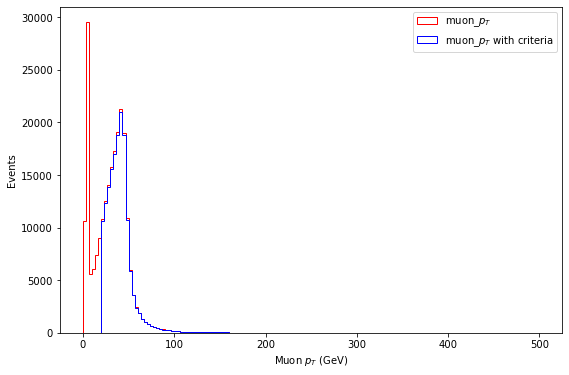

In [81]:
plt.figure(figsize=(9,6))
plt.hist(muon_pt_flat, bins=150, range=[0,500], histtype='step', color='red', label='muon_$p_T$')
plt.hist(muon_pt_masked_flat, bins=150, range=[0,500], histtype='step', color='blue', label='muon_$p_T$ with criteria')
plt.legend()
plt.xlabel(r'Muon $p_T$ (GeV)')
plt.ylabel('Events')

GenPart_statusFlags 
gen status flags stored bitwise, bits are: 0 : isPrompt, 1 : isDecayedLeptonHadron, 2 : isTauDecayProduct, 3 : isPromptTauDecayProduct, 4 : isDirectTauDecayProduct, 5 : isDirectPromptTauDecayProduct, 6 : isDirectHadronDecayProduct, 7 : isHardProcess, 8 : fromHardProcess, 9 : isHardProcessTauDecayProduct, 10 : isDirectHardProcessTauDecayProduct, 11 : fromHardProcessBeforeFSR, 12 : isFirstCopy, 13 : isLastCopy, 14 : isLastCopyBeforeFSR,

In [110]:
genpart_status, genpart_statusflags, genpart_pdgid, genpart_pt, genpart_eta, genpart_phi=file.arrays(["GenPart_status", "GenPart_statusFlags", "GenPart_pdgId", "GenPart_pt", "GenPart_eta", "GenPart_phi"], outputtype=tuple)
masking=(abs(genpart_pdgid)==13)& (genpart_status==1)
genpart_eta_masked=genpart_eta[masking]
genpart_phi_masked=genpart_phi[masking]

step 3
which is same as before.

step 4 Gen matching
Gen matching information for muon is already stored in Muon_genPartIdx, which is matched on status=1 muon using particle flow algorithm. 
Lets print the Moun_genPartIdx. Note that -1 means not matched to generated particles.


In [15]:
muon_genpartidx=file.array("Muon_genPartIdx")
muon_genpartidx

<JaggedArray [[8] [] [14 16 -1] ... [13 12] [10 8] [10 9 -1]] at 0x7fcf0827a490>

We can also do a matching ourselves using deltaR method

In [70]:
print(genpart_status)
print(genpart_statusflags)

[[21 21 22 ... 71 1 1] [21 21 22 ... 1 1 1] [21 21 22 ... 2 1 1] ... [21 21 22 ... 1 1 1] [21 21 22 ... 1 1 1] [21 21 22 ... 71 2 1]]
[[10625 14721 4481 ... 8193 12352 12352] [6529 2433 4481 ... 12352 12352 12352] [2433 10625 4481 ... 12354 12352 12352] ... [2433 2433 4481 ... 12352 12352 12352] [10625 10625 4481 ... 12352 12352 12352] [18817 2433 4481 ... 8449 28738 12352]]


In [106]:
muon_genpartidx_deltar=[]

for genetas, genphis, etas, phis in zip(genpart_eta, genpart_phi, muon_eta, muon_phi):
  idx=[]
  for eta, phi in zip(etas, phis):
    deltar=np.sqrt((genetas-eta)**2+(genphis-phi)**2)
    if deltar.min()<0.1:
        idx.append(deltar.argmin())
    else:
        idx.append(-1)
  muon_genpartidx_deltar.append(idx)

print(muon_genpartidx_deltar)
#for geneta, genphi, in zip

[[6], [], [8, 9, -1], [], [7, -1], [8], [7, -1], [11], [], [8, -1, -1], [7, -1, -1], [8], [6, 7], [8, 9], [7, 6, -1], [10, 9], [7], [-1, -1, -1], [5, 7], [4, 5], [], [8], [10, -1], [8, 9], [8, 9], [4, 5], [8, -1], [8, 7], [9, 10, -1], [6, 7, -1], [5], [8, 7], [5], [7], [14], [9, -1], [-1], [10, -1], [7], [5, -1, -1, -1, -1], [12], [8, 7], [], [8], [7, 5, -1], [12, 11], [11], [6], [6, 7], [5, 6], [6], [5, 7, 7], [7], [9], [6], [5, -1], [10, 9], [8, 9], [7, 8], [7, 8], [6, 7], [8], [13, 12], [8, 7, -1], [6, 7, -1], [5, 7, -1], [], [6, 7], [5], [8, 9], [11, 10], [6, 7], [5, -1], [9], [6], [6, 7], [10, 5], [9, 8], [12, 11], [12, 9], [8], [9, 8, -1], [8, 7], [9, 10, 10], [9, 10], [], [], [10], [8], [7, -1, -1], [6, 5], [8, 9], [7, 6], [14, 15], [], [14, 15], [6, 7, -1], [], [8], [6, 7], [9], [8, 9], [], [6, 7, -1], [7, 9], [7], [7, 8], [], [8, -1], [6, 7], [9], [7], [8], [6, 5], [], [11, 9, -1], [8, 9, -1], [10, 11], [6, -1], [7], [7, 6], [7], [12, 11, 6], [], [8], [10, 11], [9, 8], [10, 11